# Samsung Health Data Analysis:

In [1]:
#Loading required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
import datetime as dt 
from datetime import timedelta
%matplotlib inline

In [2]:
#Loading sleep dataset
samsung_df = pd.read_csv("C:/Users/Sija/Downloads/sleep-export2.csv")

#Renaming columns
samsung_df.columns = ['number','efficiency','has_sleep_data','datauuid',\
                      'quality','custom','sleep_end_time','orig_wakeup_time',\
                      'sleep_start_time','sleep_time_offset','sleep.update_time',\
                      'orig_bed_time','create_time','orig_efficiency']
samsung_df.head(3)

,number,efficiency,has_sleep_data,datauuid,quality,custom,sleep_end_time,orig_wakeup_time,sleep_start_time,sleep_time_offset,sleep.update_time,orig_bed_time,create_time,orig_efficiency
0,0,92.663040,1.0,03f12ce0-9ade-5c74-9d57-686fd3966f2a,50003.0,NaN,1520501400000,1.520501e+12,1520479380000,UTC-0400,1520516398387,1.520479e+12,1520501522181,92.66304
1,1,87.788020,1.0,0419de25-ff8a-e425-0864-7e83b7f5d991,NaN,NaN,1519565280000,NaN,1519539300000,UTC-0400,1519565416332,NaN,1519565416332,NaN
2,2,90.026955,1.0,048b90e0-1e31-7875-337c-e9d8c24bea59,NaN,NaN,1527932940000,NaN,1527910620000,UTC-0300,1527932972094,NaN,1527932972094,NaN


In [3]:
#Converting millisecond to readable datetime objects, dropping irrelevant columns and with NAN values
samsung_df['sleep_end_time'] = pd.to_datetime(samsung_df['sleep_end_time'], unit='ms')
samsung_df['sleep_start_time'] = pd.to_datetime(samsung_df['sleep_start_time'], unit='ms')
samsung_df['sleep.update_time'] = pd.to_datetime(samsung_df['sleep.update_time'], unit='ms')
samsung_df['create_time'] = pd.to_datetime(samsung_df['create_time'], unit='ms')

#Data cleaning
samsung_df.drop(['number','custom','quality','orig_wakeup_time','orig_bed_time','orig_efficiency',\
                 'datauuid','has_sleep_data','sleep.update_time'],axis=1, inplace=True)
samsung_df = samsung_df.sort_values('create_time', ascending = True)
samsung_df = samsung_df.reset_index(drop=True)
samsung_df.head()

,efficiency,sleep_end_time,sleep_start_time,sleep_time_offset,create_time
0,94.902916,2017-12-16 11:53:00,2017-12-16 05:02:00,UTC-0400,2017-12-16 12:08:04.768
1,96.341460,2017-12-18 11:42:00,2017-12-18 03:31:00,UTC-0400,2017-12-18 11:57:19.246
2,93.174065,2017-12-20 08:48:00,2017-12-20 03:55:00,UTC-0400,2017-12-20 08:57:23.977
3,91.434265,2017-12-22 17:18:00,2017-12-22 08:57:00,UTC-0700,2017-12-22 17:33:23.295
4,93.188850,2017-12-23 15:10:00,2017-12-23 09:48:00,UTC-0700,2017-12-23 15:25:03.272


In [4]:
#Check if there is NAN values
len(samsung_df.index)-samsung_df.count()

efficiency           0
sleep_end_time       0
sleep_start_time     0
sleep_time_offset    0
create_time          0
dtype: int64

In [5]:
#Adjusting UTC offset
y=[]
for x in samsung_df['sleep_time_offset'].str[3:6]:
    y.append(int(x))
    
samsung_df['adj_create_time'] = 0
samsung_df['adj_start_time'] = 0
samsung_df['adj_end_time'] = 0 
i=0
for item in y:
    samsung_df['adj_create_time'][i] = samsung_df.create_time[i] + dt.timedelta(hours=item)
    samsung_df['adj_start_time'][i] = samsung_df.sleep_start_time[i] + dt.timedelta(hours=item)
    samsung_df['adj_end_time'][i] = samsung_df.sleep_end_time[i] + dt.timedelta(hours=item)
    i+=1

samsung_df['adj_create_time'] = pd.to_datetime(samsung_df['adj_create_time'])
samsung_df['adj_start_time'] = pd.to_datetime(samsung_df['adj_start_time'])
samsung_df['adj_end_time'] = pd.to_datetime(samsung_df['adj_end_time'])

#Creating a common create date column to join the datasets
samsung_df['create_date'] = samsung_df['adj_create_time'].dt.date
samsung_df.drop(['sleep_end_time','sleep_start_time'],axis=1, inplace=True)
samsung_df.head()

C:\Users\Sija\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Sija\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\Sija\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,efficiency,sleep_time_offset,create_time,adj_create_time,adj_start_time,adj_end_time,create_date
0,94.902916,UTC-0400,2017-12-16 12:08:04.768,2017-12-16 08:08:04.768,2017-12-16 01:02:00,2017-12-16 07:53:00,2017-12-16
1,96.341460,UTC-0400,2017-12-18 11:57:19.246,2017-12-18 07:57:19.246,2017-12-17 23:31:00,2017-12-18 07:42:00,2017-12-18
2,93.174065,UTC-0400,2017-12-20 08:57:23.977,2017-12-20 04:57:23.977,2017-12-19 23:55:00,2017-12-20 04:48:00,2017-12-20
3,91.434265,UTC-0700,2017-12-22 17:33:23.295,2017-12-22 10:33:23.295,2017-12-22 01:57:00,2017-12-22 10:18:00,2017-12-22
4,93.188850,UTC-0700,2017-12-23 15:25:03.272,2017-12-23 08:25:03.272,2017-12-23 02:48:00,2017-12-23 08:10:00,2017-12-23


In [6]:
samsung_df.dtypes

efficiency                  float64
sleep_time_offset            object
create_time          datetime64[ns]
adj_create_time      datetime64[ns]
adj_start_time       datetime64[ns]
adj_end_time         datetime64[ns]
create_date                  object
dtype: object

### Bedtime Hours:

Text(0.5,1,'Histogram of bedtime start hour')

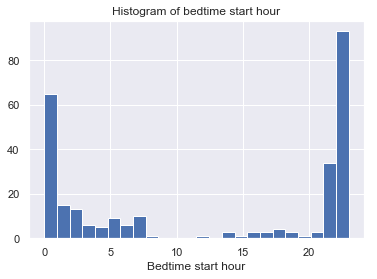

In [7]:
sam_starthr = samsung_df['adj_start_time'].dt.hour

plt.hist(sam_starthr, bins=24, density = False)
plt.xlabel('Bedtime start hour')
plt.title('Histogram of bedtime start hour')

Most common sleep start hour is 22:00-23:00 followed by 23:00-00:00.

### Sleep Duration:

Text(0.5,0,'Minutes slept')

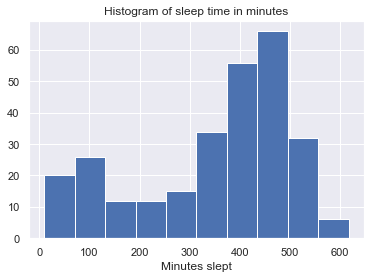

In [8]:
#Calculate minutes slept from the start and end time
samsung_df['minutes_slept'] = (pd.to_timedelta(samsung_df.adj_end_time-samsung_df.adj_start_time).dt.total_seconds()//60).astype(int)

plt.hist(samsung_df['minutes_slept'])
plt.title('Histogram of sleep time in minutes')
plt.xlabel('Minutes slept')

Average sleep time is 450-500 minutes or 7.5-8 hours. We can discard the minutes slept <300 as these might be daytime powernaps

Text(0,0.5,'Duration of sleep(mins)')

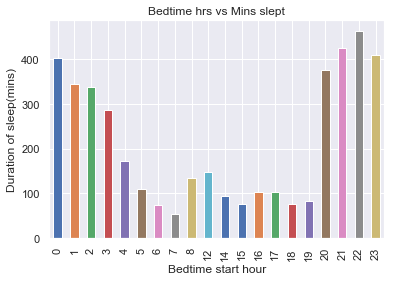

In [9]:
#Plot of relation between bedtime hour and sleep duration
ax=samsung_df.groupby(samsung_df['adj_start_time'].dt.hour)['minutes_slept'].mean().plot(kind='bar',title='Bedtime hrs vs Mins slept')
ax.set_xlabel("Bedtime start hour")
ax.set_ylabel("Duration of sleep(mins)")

The bedtime start hours vary between 8pm and 2pm, and we can see that the avg sleep duration is longer when 
the bedtime start hour is 10pm. So that is the ideal bettime for this person

Text(0.5,1,'Sleep duration over time')

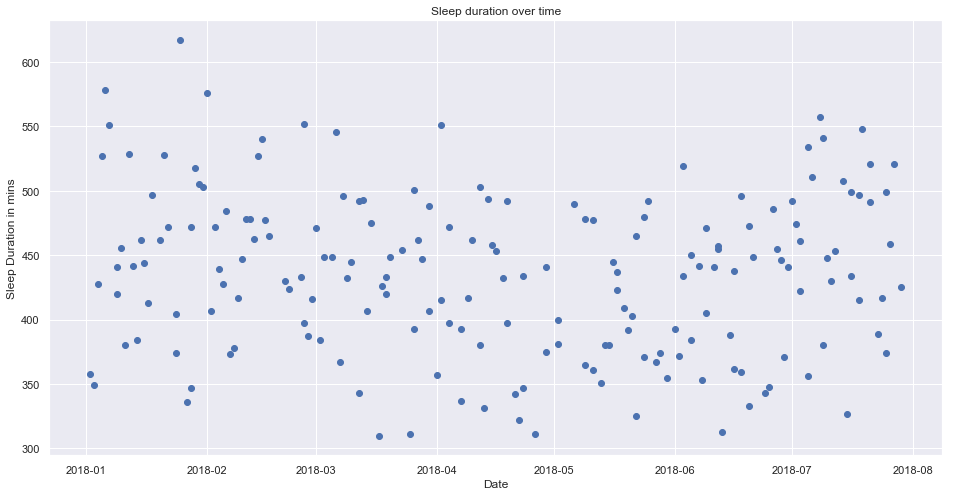

In [10]:
#Sleep duration across time. We will consider instances where the minutes slept is more than or equal to 5hrs. 
sleep_df_2018 = samsung_df[samsung_df['minutes_slept']>=300]
sleep_df_2018 = sleep_df_2018[sleep_df_2018['adj_start_time'].dt.year>2017]
sam_date = pd.to_datetime(sleep_df_2018['adj_start_time'].dt.date)
sam_sleep_dur = sleep_df_2018['minutes_slept']

plt.figure(figsize=(16,8))
plt.plot_date(sam_date, sam_sleep_dur)
plt.xlabel('Date')
plt.ylabel('Sleep Duration in mins')
plt.title('Sleep duration over time')

Sleep duration seems to be affected during May and June as the average minutes slept has fallen below 500mins. 

Text(0.5,1,'Sleep Duration Over Time with regression curve')

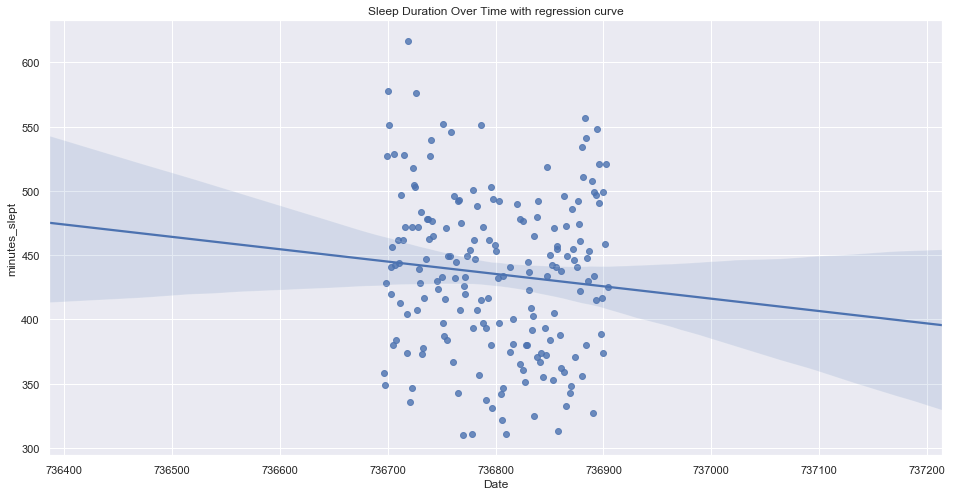

In [11]:
#converting dates to ordinals in order to use seaborn regplot function
sleep_df_2018['startdate_ordinal'] = pd.to_datetime(sleep_df_2018['adj_start_time']).apply(lambda date: date.toordinal())

#Make a plot with the ordinals on the date axis
plt.figure(figsize=(16,8))
ax = sns.regplot(sleep_df_2018['startdate_ordinal'], sam_sleep_dur)
ax.set_xlabel('Date')
ax.set_title('Sleep Duration Over Time with regression curve')

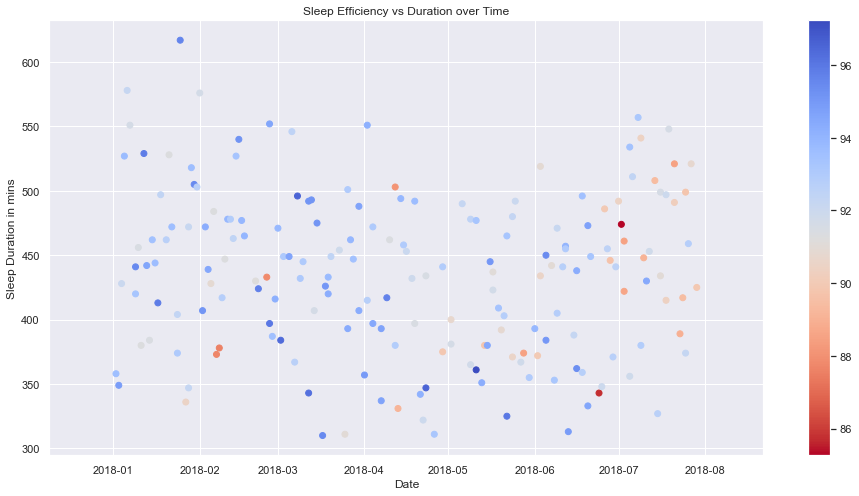

In [12]:
plt.figure(figsize=(16,8))
dates = [pd.to_datetime(d) for d in sam_date]
plt.scatter(dates, sam_sleep_dur, c=sleep_df_2018['efficiency'], cmap='coolwarm_r')
plt.xlabel('Date')
plt.ylabel('Sleep Duration in mins')
plt.title('Sleep Efficiency vs Duration over Time')
plt.colorbar()
plt.show()

Sleep Efficiency does not seem to depend on duration. Efficiency appears to be low around July, possibly as
an after effect of low sleep duration in May and June

Text(0,0.5,'Duration of sleep(mins)')

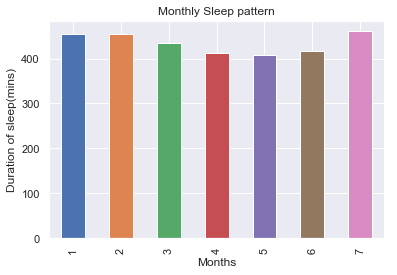

In [13]:
#Plot of monthly sleep pattern 
ax=sleep_df_2018.groupby(sleep_df_2018['adj_start_time'].dt.month)['minutes_slept'].mean().plot(kind='bar',title='Monthly Sleep pattern')
ax.set_xlabel("Months")
ax.set_ylabel("Duration of sleep(mins)")

As we had inferred from the scatter plot, the person's sleep is effected between Apr-Jun

Text(0,0.5,'Efficiency')

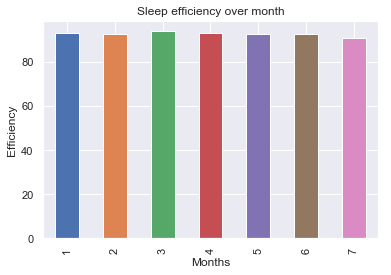

In [15]:
#Plot of monthly sleep pattern
ax=sleep_df_2018.groupby(sleep_df_2018.adj_create_time.dt.month)['efficiency'].mean().plot(kind="bar",title='Sleep efficiency over month')
ax.set_xlabel("Months")
ax.set_ylabel("Efficiency")

Sleep efficiency is more or less consistent over months. 

Sleep quality has been high consistently. Few data has 0 values for quality which can be ignored

### Adding exercise data

In [16]:
#Loading exercise data
exercise_df = pd.read_csv("C:/Users/Sija/Downloads/exercise.csv")
exercise_df.head(2)

,Unnamed: 0,end_time,altitude_loss,max_altitude,start_time,count,altitude_gain,exercise_custom_type,duration,deviceuuid,...,min_heart_rate,count_type,live_data,max_caloricburn_rate,custom,comment,additional,distance,datauuid,create_time
0,0,2018-04-07 17:40:40.673,NaN,NaN,2018-04-07 17:26:10.149,NaN,NaN,NaN,870524,F/D7+hL5E5,...,0.0,NaN,009c4899-f8fb-c887-294a-045dcce7c880.live_data...,NaN,NaN,NaN,NaN,1008.61,009c4899-f8fb-c887-294a-045dcce7c880,2018-04-07 17:41:42.416
1,1,2018-01-27 10:08:00.000,NaN,NaN,2018-01-27 09:38:00.000,0.0,NaN,NaN,1800000,jQfnryI8/B,...,NaN,30004.0,NaN,NaN,NaN,NaN,NaN,0.00,013f807f-0b24-45da-9df7-446c2e297a4f,2018-01-27 10:08:40.225


In [17]:
#Check if there is NAN values
len(exercise_df.index)-exercise_df.count()

Unnamed: 0                 0
end_time                   0
altitude_loss            334
max_altitude             331
start_time                 0
count                    305
altitude_gain            334
exercise_custom_type     341
duration                   0
deviceuuid                 0
max_heart_rate           122
max_rpm                  341
mean_heart_rate          122
pkg_name                   0
max_cadence              121
time_offset                0
mean_caloricburn_rate    341
incline_distance         290
exercise_type              0
decline_distance         290
max_speed                 85
mean_power               341
max_power                341
mean_rpm                 341
calorie                    0
mean_cadence             121
mean_speed                12
update_time                0
min_altitude             331
min_heart_rate           122
count_type               305
live_data                 33
max_caloricburn_rate     341
custom                   341
comment       

In [18]:
#Changing duration from ms to mins
exercise_df['duration_mins'] = exercise_df['duration']//60000

#Deleting incomplete columns
exercise_df.drop(['Unnamed: 0', 'altitude_loss', 'max_altitude','count', 'altitude_gain', 'exercise_custom_type', \
                  'max_heart_rate', 'max_rpm', 'mean_heart_rate','pkg_name', 'max_cadence', 'time_offset', \
                  'mean_caloricburn_rate','incline_distance', 'decline_distance', 'max_speed', 'mean_power', \
                  'max_power', 'mean_rpm', 'mean_cadence','mean_speed', 'update_time', 'min_altitude', 'min_heart_rate',\
                  'count_type', 'live_data', 'max_caloricburn_rate', 'custom', 'comment','additional', 'distance',\
                  'datauuid','duration'],axis=1, inplace=True)

exercise_df = exercise_df.sort_values('create_time', ascending = True)
exercise_df = exercise_df.reset_index(drop=True)
exercise_df['create_time'] = pd.to_datetime(exercise_df['create_time'])
exercise_df['create_date'] = exercise_df['create_time'].dt.date
exercise_df['exercise_type'] = exercise_df['exercise_type'].apply(str)
exercise_df.head()

,end_time,start_time,deviceuuid,exercise_type,calorie,create_time,duration_mins,create_date
0,2016-06-25 10:34:00.642,2016-06-25 10:28:30.517,jQfnryI8/B,1002,66.0,2016-06-25 10:28:30.526,5,2016-06-25
1,2016-09-24 19:13:43.659,2016-09-24 18:22:47.097,jQfnryI8/B,13001,105.0,2016-09-24 18:22:47.100,16,2016-09-24
2,2016-09-27 21:04:05.302,2016-09-27 20:21:42.571,jQfnryI8/B,1002,408.0,2016-09-27 20:21:42.576,40,2016-09-27
3,2016-09-30 23:42:10.952,2016-09-30 21:29:56.624,jQfnryI8/B,1002,459.0,2016-09-30 21:29:56.628,32,2016-09-30
4,2017-03-06 10:22:41.693,2017-03-06 10:05:28.618,jQfnryI8/B,1002,230.0,2017-03-06 10:05:28.624,16,2017-03-06


Text(0.5,0,'Minutes')

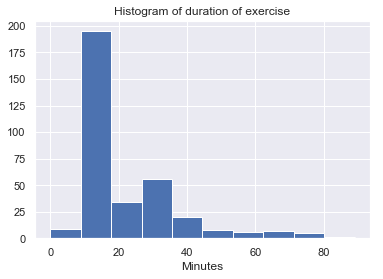

In [19]:
plt.hist(exercise_df.duration_mins, density = False)
plt.title('Histogram of duration of exercise')
plt.xlabel('Minutes')

Average of 10-15mins of exercise time

#### Exercise type

In [ ]:
#Description of exercise

Exercise name	Exercise type
Custom type	           0
Walking	             1001
Running	             1002
Cycling	            11007
Hiking	            13001
Swimming	        14001
Elliptical trainer	15006

Text(0,0.5,'Duration')

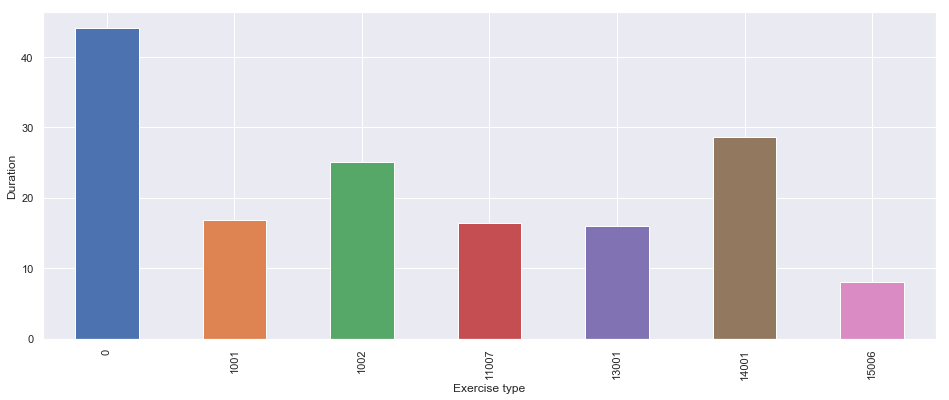

In [20]:
#Duration of exercise based on exercice type
plt.figure(figsize=(16,6))
ax= exercise_df.groupby(exercise_df['exercise_type'])['duration_mins'].mean().plot(kind='bar')
ax.set_xlabel('Exercise type')
ax.set_ylabel('Duration')

We can ignore the custom type exercise(0) data. Looks like the persom spends a lot of time swimming and running

Text(0,0.5,'Calories burned')

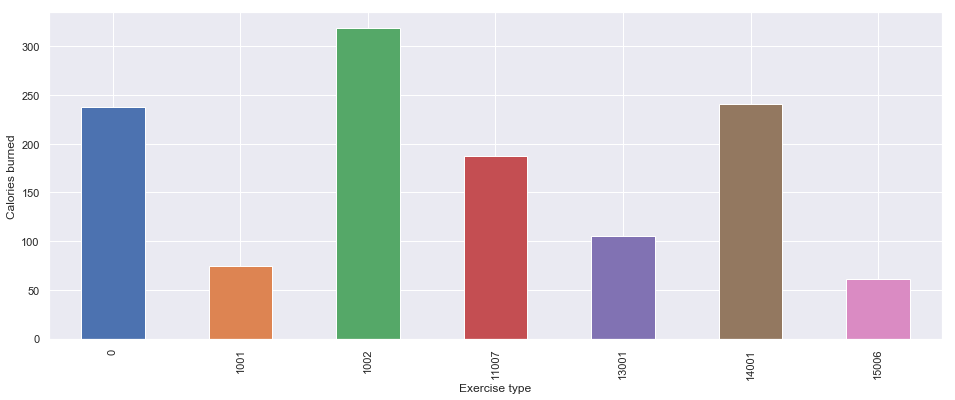

In [21]:
#Calories burnt based on exercice type
plt.figure(figsize=(16,6))
ax= exercise_df.groupby(exercise_df['exercise_type'])['calorie'].mean().plot(kind='bar')
ax.set_xlabel('Exercise type')
ax.set_ylabel('Calories burned')

The most amount of calorie is burnt by doing exercise type 1002 -Running followed by 14001 -Swimming. This could also be because 
the person spends more time on these exercise types



Text(0.5,1,'Exercise duration over time')

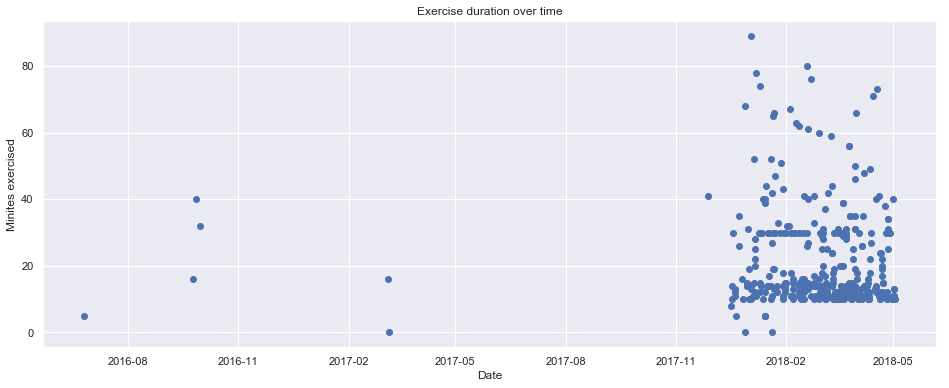

In [22]:
### Duration over time
plt.figure(figsize=(16,6))
plt.plot_date(exercise_df.create_date, exercise_df.duration_mins)
plt.xlabel('Date')
plt.ylabel('Minites exercised')
plt.title("Exercise duration over time")

Data available are concentrated around 2018. So we will consider this year to get a better idea of the plot

Text(0.5,1,'Exercise duration over time(2018)')

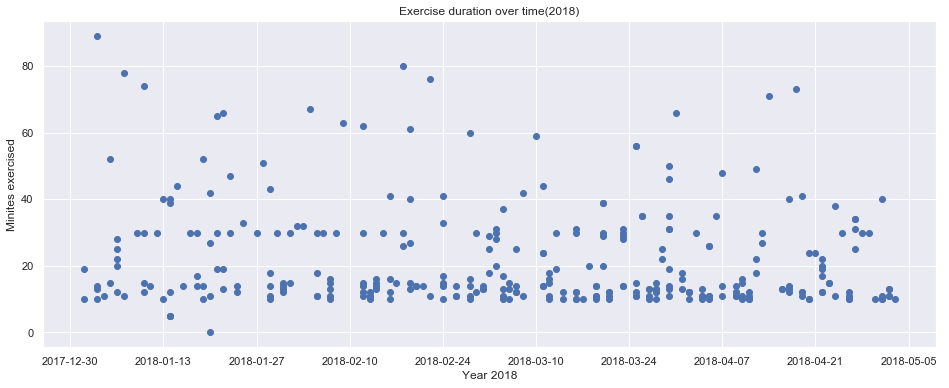

In [23]:
###Plot for 2018 dates
exercise_df_2018 = exercise_df[exercise_df.create_time.dt.year > 2017]
plt.figure(figsize=(16,6))
plt.plot_date(exercise_df_2018.create_time.dt.date, exercise_df_2018.duration_mins)
plt.xlabel('Year 2018')
plt.ylabel('Minites exercised')
plt.title("Exercise duration over time(2018)")

Text(0,0.5,'Exercise duration(mins)')

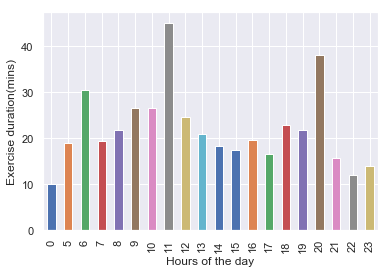

In [25]:
### To understand the pattern better lets plot the duration of exercise for various hours in the day
ax = exercise_df_2018.groupby(exercise_df_2018['create_time'].dt.hour)['duration_mins'].mean().plot(kind="bar")
ax.set_xlabel("Hours of the day")
ax.set_ylabel("Exercise duration(mins)")

Peek hours of exercise is observed at 11am and 8pm. 
This could be because the person walks/cycles to the office and office hours are between 11am and 8pm

Text(0,0.5,'Exercise duration(mins)')

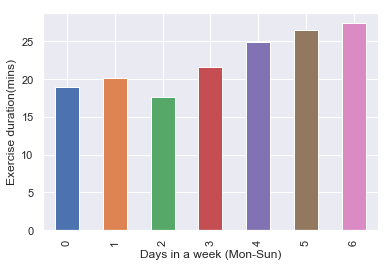

In [26]:
### To understand the pattern better lets plot the duration of exercise on different days in a week
ax = exercise_df_2018.groupby(exercise_df_2018['create_time'].dt.weekday)['duration_mins'].mean().plot(kind="bar")
ax.set_xlabel("Days in a week (Mon-Sun)")
ax.set_ylabel("Exercise duration(mins)")

Text(0.5,1,'Exercise duration vs Calories burned')

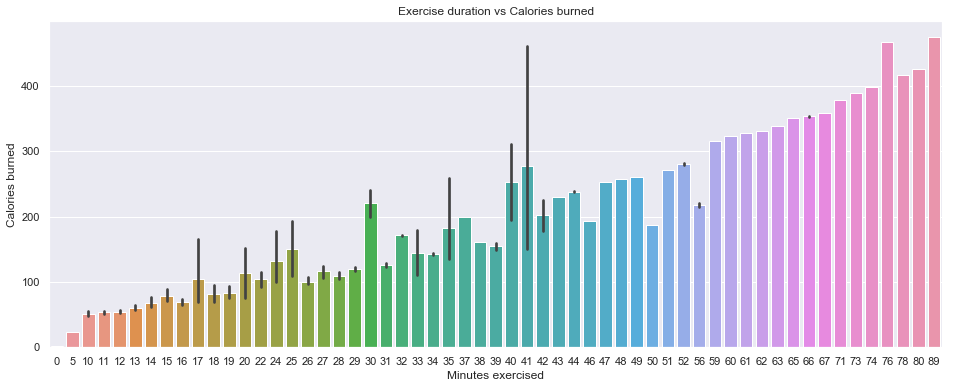

In [27]:
#Lets plot the calories burned vs duration of exercise
plt.figure(figsize=(16,6))
sns.barplot(x=exercise_df_2018.duration_mins, y=exercise_df_2018.calorie, data = exercise_df_2018)
plt.xlabel('Minutes exercised')
plt.ylabel('Calories burned')
plt.title('Exercise duration vs Calories burned')

As expected, calories burned up increases with duration of exercise

Text(0,0.5,'Calories')

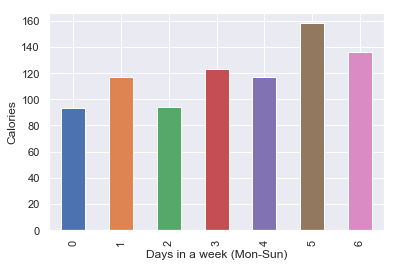

In [28]:
#Calories burnt on different days
ax = exercise_df_2018.groupby(exercise_df_2018['create_time'].dt.weekday)['calorie'].mean().plot(kind="bar")
ax.set_xlabel("Days in a week (Mon-Sun)")
ax.set_ylabel("Calories")

Text(0.5,1,'Exercise duration vs Calories burned with hue as exercice type')

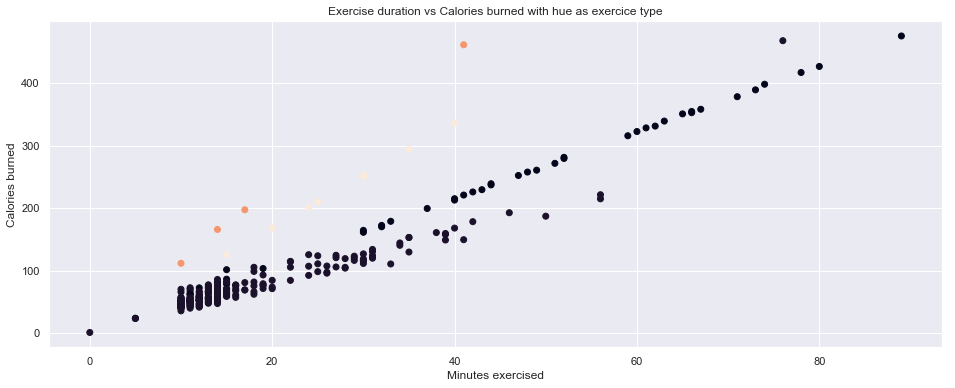

In [31]:
#Adding the type of exercise element to the plot
plt.figure(figsize=(16,6))
plt.scatter(x=exercise_df_2018.duration_mins, y=exercise_df_2018.calorie, data = exercise_df_2018, \
            c = exercise_df_2018.exercise_type)
plt.xlabel('Minutes exercised')
plt.ylabel('Calories burned')
plt.title('Exercise duration vs Calories burned with hue as exercice type')

### Heart rate data

In [32]:
heartrate_df = pd.read_csv("C:/Users/Sija/Downloads/heart_rate.csv")
heartrate_df.head(2)

,Unnamed: 0,end_time,heart_rate,binning_data,start_time,heart_beat_count,update_time,max,min,pkg_name,time_offset,datauuid,create_time
0,0,2017-12-16 04:30:29.450,60.0,NaN,2017-12-16 04:30:29.450,1,2017-12-16 04:35:00.341,0.0,0.0,com.sec.android.app.shealth,UTC-0400,00978ee8-6b03-16cb-7bba-d22949a728cb,2017-12-16 04:35:00.341
1,1,2017-12-16 05:50:29.380,56.0,NaN,2017-12-16 05:50:29.380,1,2017-12-16 05:55:00.264,0.0,0.0,com.sec.android.app.shealth,UTC-0400,038d68e5-ddb9-df1f-f52f-4f85c32cb95a,2017-12-16 05:55:00.264


In [33]:
#Check if there is NAN values
len(heartrate_df.index)-heartrate_df.count()

Unnamed: 0            0
end_time              0
heart_rate            0
binning_data        310
start_time            0
heart_beat_count      0
update_time           0
max                  17
min                  17
pkg_name              0
time_offset           0
datauuid              0
create_time           0
dtype: int64

In [34]:
#Deleting incomplete columns
heartrate_df.drop(['Unnamed: 0','binning_data','max','min','pkg_name','update_time','datauuid','heart_beat_count'],axis=1,inplace=True)
heartrate_df = heartrate_df.sort_values('create_time', ascending = True)
heartrate_df = heartrate_df.reset_index(drop=True)
heartrate_df.head()

,end_time,heart_rate,start_time,time_offset,create_time
0,2016-06-09 14:41:09.456,52.0,2016-06-09 14:41:04.783,UTC+0530,2016-06-09 14:41:38.226
1,2016-06-10 04:05:36.753,76.0,2016-06-10 04:05:33.590,UTC+0530,2016-06-10 04:05:45.925
2,2016-06-11 01:29:38.666,61.0,2016-06-11 01:29:15.020,UTC+0530,2016-06-11 01:29:51.197
3,2016-06-11 07:38:31.311,66.0,2016-06-11 07:38:27.445,UTC+0530,2016-06-11 07:38:39.844
4,2016-06-13 06:04:58.623,61.0,2016-06-13 06:04:18.535,UTC+0530,2016-06-13 06:05:03.612


In [35]:
#Adjusting UTC offset
h=[]
m=[]
for x in heartrate_df['time_offset'].str[3:6]:
    h.append(int(x))
for x in heartrate_df['time_offset'].str[6:8]:
    if x == '3':
        m.append(30)
    else:
        m.append(int(x))
    
heartrate_df['create_time'] = pd.to_datetime(heartrate_df['create_time'])
heartrate_df['adj_create_time'] = 0

i=0
for item in h:
    heartrate_df['adj_create_time'][i] = heartrate_df.create_time[i] + dt.timedelta(hours=item)
    i+=1

i=0
for item in m:
    heartrate_df['adj_create_time'][i] = heartrate_df.adj_create_time[i] + dt.timedelta(minutes=item)
    i+=1
    
heartrate_df['adj_create_time'] = pd.to_datetime(heartrate_df['adj_create_time'])


#Creating a common create date column to join the datasets
heartrate_df['create_date'] = heartrate_df['adj_create_time'].dt.date
heartrate_df.drop(['end_time','start_time'],axis=1, inplace=True)
heartrate_df.head()

C:\Users\Sija\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Sija\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,heart_rate,time_offset,create_time,adj_create_time,create_date
0,52.0,UTC+0530,2016-06-09 14:41:38.226,2016-06-09 20:11:38.226,2016-06-09
1,76.0,UTC+0530,2016-06-10 04:05:45.925,2016-06-10 09:35:45.925,2016-06-10
2,61.0,UTC+0530,2016-06-11 01:29:51.197,2016-06-11 06:59:51.197,2016-06-11
3,66.0,UTC+0530,2016-06-11 07:38:39.844,2016-06-11 13:08:39.844,2016-06-11
4,61.0,UTC+0530,2016-06-13 06:05:03.612,2016-06-13 11:35:03.612,2016-06-13


Text(0.5,0,'Heartrate (bpm)')

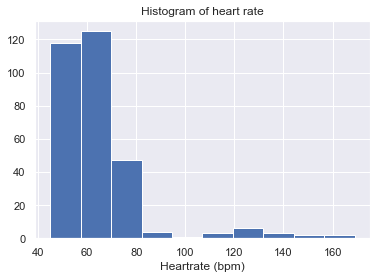

In [36]:
### Histogram of heart rate
plt.hist(heartrate_df['heart_rate'], density = False)
plt.title('Histogram of heart rate')
plt.xlabel('Heartrate (bpm)')

Average heart rate is 60-70bpm, with few values going up to 160, probably during exercise

Text(0,0.5,'Heart rate')

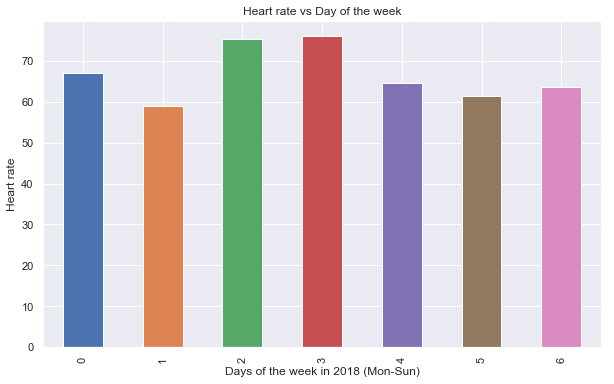

In [37]:
### Heartrate on various days 
plt.figure(figsize=(10,6))
heartrate_df_2018 = heartrate_df[heartrate_df.create_time.dt.year>2017]
ax= heartrate_df_2018.groupby(heartrate_df_2018.create_time.dt.weekday)['heart_rate'].mean().plot(kind="bar", title="Heart rate vs Day of the week")
ax.set_xlabel("Days of the week in 2018 (Mon-Sun)")
ax.set_ylabel("Heart rate")

Heart rate (for 2018) seems to be higher on Wed and Thur, this is not consistent with the exercise duration and calories burned data.

Text(0,0.5,'Heart rate')

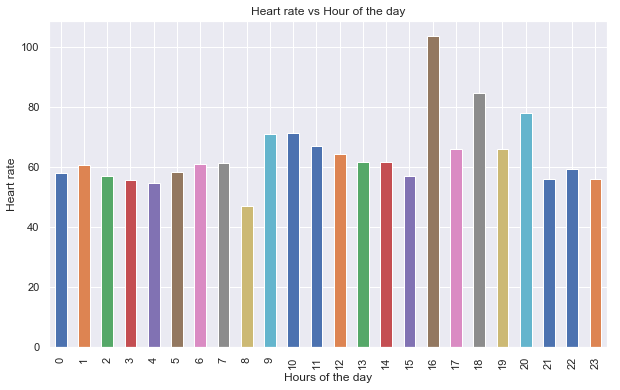

In [38]:
###Variation of heart rate over hours in a day
plt.figure(figsize=(10,6))
ax= heartrate_df_2018.groupby(heartrate_df_2018['create_time'].dt.hour)['heart_rate'].mean().plot(kind="bar", title="Heart rate vs Hour of the day")
ax.set_xlabel("Hours of the day")
ax.set_ylabel("Heart rate")

Rate is higher at 4pm, must be the traffic on the way back home!

### Floors climbed

In [39]:
floors_climbed_df = pd.read_csv("C:/Users/Sija/Downloads/floors_climbed.csv")
floors_climbed_df.head()

,Unnamed: 0,end_time,pkg_name,time_offset,start_time,floor,datauuid,update_time,create_time
0,0,2018-01-24 21:30:56.000,com.sec.android.app.shealth,UTC-0400,2018-01-24 21:29:51.000,2.0,00443274-6e30-97f9-3eb2-75d17f3e766f,2018-01-24 21:34:47.756,2018-01-24 21:34:47.720
1,1,2018-03-27 21:04:27.000,com.sec.android.app.shealth,UTC-0300,2018-03-27 21:04:01.000,1.0,00ed787d-a38b-8fcf-886d-b15a30e02ff6,2018-03-27 21:11:51.606,2018-03-27 21:11:51.606
2,2,2018-02-12 07:40:16.000,com.sec.android.app.shealth,UTC-0400,2018-02-12 07:38:21.000,2.0,012ee314-b5de-8ac7-0421-c634e858ebc4,2018-02-12 07:41:27.854,2018-02-12 07:41:27.802
3,3,2018-03-16 17:17:22.000,com.sec.android.app.shealth,UTC-0300,2018-03-16 17:17:05.000,1.0,016876d6-2d1f-5514-a6c2-12b580e0654c,2018-03-16 17:22:41.066,2018-03-16 17:22:41.044
4,4,2018-01-22 15:50:38.000,com.sec.android.app.shealth,UTC-0400,2018-01-22 15:50:22.000,1.0,01c24d32-905b-9f65-732e-3c13faf2a1c4,2018-01-22 15:52:59.388,2018-01-22 15:52:59.367


In [40]:
#Check if there is NAN values
len(floors_climbed_df.index)-floors_climbed_df.count()

Unnamed: 0     0
end_time       0
pkg_name       0
time_offset    0
start_time     0
floor          0
datauuid       0
update_time    0
create_time    0
dtype: int64

In [41]:
floors_climbed_df.drop(['Unnamed: 0','pkg_name','update_time','datauuid'],axis=1,inplace=True)
floors_climbed_df = floors_climbed_df.sort_values('create_time', ascending = True)
floors_climbed_df = floors_climbed_df.reset_index(drop=True)
floors_climbed_df.head()

,end_time,time_offset,start_time,floor,create_time
0,2017-12-16 08:48:18.000,UTC-0400,2017-12-16 08:46:12.000,9.0,2017-12-16 08:48:48.886
1,2017-12-16 11:28:23.000,UTC-0400,2017-12-16 11:28:13.000,1.0,2017-12-16 11:32:40.719
2,2017-12-17 17:48:36.000,UTC-0400,2017-12-17 17:46:26.000,9.0,2017-12-17 17:47:23.443
3,2017-12-18 08:16:28.000,UTC-0400,2017-12-18 08:12:32.000,6.0,2017-12-18 08:15:13.725
4,2017-12-18 09:15:38.000,UTC-0400,2017-12-18 09:15:09.000,1.0,2017-12-18 09:15:36.285


In [42]:
floors_climbed_df.time_offset.unique()

array(['UTC-0400', 'UTC-0700', 'UTC-0300'], dtype=object)

In [43]:
#Adjusting UTC offset
h=[]
for x in floors_climbed_df['time_offset'].str[3:6]:
    h.append(int(x))
    
floors_climbed_df['create_time'] = pd.to_datetime(floors_climbed_df['create_time'])
floors_climbed_df['adj_create_time'] = 0

i=0
for item in h:
    floors_climbed_df['adj_create_time'][i] = floors_climbed_df.create_time[i] + dt.timedelta(hours=item)
    i+=1

floors_climbed_df['adj_create_time'] = pd.to_datetime(floors_climbed_df['adj_create_time'])

#Creating a common create date column to join the datasets
floors_climbed_df['create_date'] = floors_climbed_df['adj_create_time'].dt.date
floors_climbed_df.drop(['end_time','start_time'],axis=1, inplace=True)
floors_climbed_df.head()

C:\Users\Sija\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,time_offset,floor,create_time,adj_create_time,create_date
0,UTC-0400,9.0,2017-12-16 08:48:48.886,2017-12-16 04:48:48.886,2017-12-16
1,UTC-0400,1.0,2017-12-16 11:32:40.719,2017-12-16 07:32:40.719,2017-12-16
2,UTC-0400,9.0,2017-12-17 17:47:23.443,2017-12-17 13:47:23.443,2017-12-17
3,UTC-0400,6.0,2017-12-18 08:15:13.725,2017-12-18 04:15:13.725,2017-12-18
4,UTC-0400,1.0,2017-12-18 09:15:36.285,2017-12-18 05:15:36.285,2017-12-18


Text(0.5,0,'Number of floors')

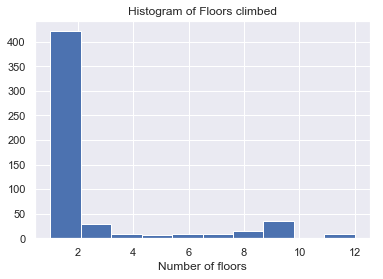

In [44]:
### Hist of floors
plt.hist(floors_climbed_df.floor, density = False)
plt.title('Histogram of Floors climbed')
plt.xlabel('Number of floors')

The most climed is 1 floor, but this is not very useful for our analysis.
It is wise to consider cases where the floor climbed is more than 5 floors

Text(0,0.5,'Number of floors')

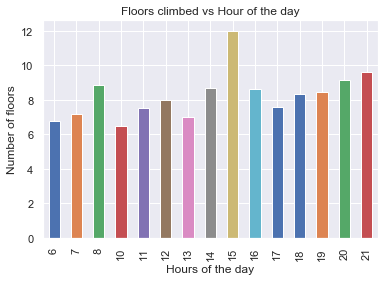

In [45]:
#Filtering the floors below 5 and data before 2018
floors_climbed_df_rel = floors_climbed_df[floors_climbed_df.floor>=5]
floors_climbed_df_rel_2018 = floors_climbed_df_rel[floors_climbed_df_rel.create_time.dt.year>2017]
ax= floors_climbed_df_rel_2018.groupby(floors_climbed_df_rel_2018['create_time'].dt.hour)['floor'].mean().plot(kind="bar", title="Floors climbed vs Hour of the day")
ax.set_xlabel("Hours of the day")
ax.set_ylabel("Number of floors")


The average number of floors climbed are more later in the day(7-9pm), with highest number of floors climbed around 3:00pm
We can assume that he takes the floors when he goes back to home.
The information is consistent with sleep data as there is no activities recoded between 10pm and 6am.

Text(0,0.5,'Number of floors')

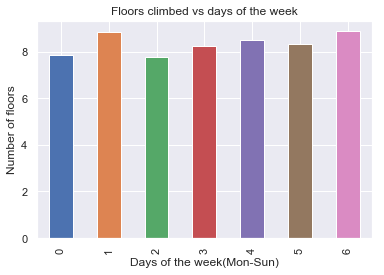

In [46]:
### Over various days
ax= floors_climbed_df_rel_2018.groupby(floors_climbed_df_rel_2018['create_time'].dt.weekday)['floor'].mean().plot(kind="bar", title="Floors climbed vs days of the week")
ax.set_xlabel("Days of the week(Mon-Sun)")
ax.set_ylabel("Number of floors")

More climbs happen on Tuesdays and strangely on Sundays. It is possible that this includes the 
stairs in the person's house which is used more often on weekends when at home.

### Step count

In [48]:
stepcount_df = pd.read_csv("C:/Users/Sija/Downloads/step_count.csv")
stepcount_df.head(3)

,Unnamed: 0,end_time,start_time,count,calorie,update_time,speed,pkg_name,time_offset,distance,datauuid,create_time
0,0,2018-04-30 18:21:59.999,2018-04-30 18:21:00.000,101,4.29,2018-04-30 18:35:00.291,1.527778,com.sec.android.app.shealth,UTC-0300,78.42,0001af94-3253-4fec-0efc-153d3a8a2441,2018-04-30 18:35:00.290
1,1,2018-04-13 19:47:59.999,2018-04-13 19:47:00.000,25,0.96,2018-04-13 19:55:00.251,1.027778,com.sec.android.app.shealth,UTC-0300,14.36,0001c2a5-c751-4c86-456f-179d46bd29a9,2018-04-13 19:55:00.251
2,2,2018-04-02 10:01:59.999,2018-04-02 10:01:00.000,38,1.53,2018-04-02 10:14:58.210,1.194444,com.sec.android.app.shealth,UTC-0300,24.19,0003c0db-c795-1f80-17a4-582751b3a2ba,2018-04-02 10:14:58.209


In [49]:
#Check if there is NAN values
len(stepcount_df.index)-stepcount_df.count()

Unnamed: 0     0
end_time       0
start_time     0
count          0
calorie        0
update_time    0
speed          0
pkg_name       0
time_offset    0
distance       0
datauuid       0
create_time    0
dtype: int64

In [50]:
stepcount_df.drop(['Unnamed: 0','pkg_name','update_time','datauuid'],axis=1,inplace=True)
stepcount_df = stepcount_df.sort_values('create_time', ascending = True)
stepcount_df = stepcount_df.reset_index(drop=True)
stepcount_df.head()

,end_time,start_time,count,calorie,speed,time_offset,distance,create_time
0,2018-03-31 07:01:59.999,2018-03-31 07:01:00.000,21,0.87,1.472222,UTC-0300,14.89,2018-03-31 07:15:01.219
1,2018-03-31 07:03:59.999,2018-03-31 07:03:00.000,17,0.70,2.111111,UTC-0300,14.25,2018-03-31 07:15:01.270
2,2018-03-31 07:04:59.999,2018-03-31 07:04:00.000,22,0.90,1.638889,UTC-0300,15.41,2018-03-31 07:15:01.281
3,2018-03-31 07:15:59.999,2018-03-31 07:15:00.000,17,0.65,1.111111,UTC-0300,10.03,2018-03-31 07:16:53.599
4,2018-03-31 07:16:59.999,2018-03-31 07:16:00.000,10,0.42,1.805556,UTC-0300,7.67,2018-03-31 07:16:53.611


In [51]:
#Adjusting UTC offset
h=[]
for x in stepcount_df['time_offset'].str[3:6]:
    h.append(int(x))
    
stepcount_df['create_time'] = pd.to_datetime(stepcount_df['create_time'])
stepcount_df['adj_create_time'] = 0

j=0
for item in h:
    stepcount_df['adj_create_time'][j] = stepcount_df.create_time[j] + dt.timedelta(hours=item)
    j+=1

stepcount_df['adj_create_time'] = pd.to_datetime(stepcount_df['adj_create_time'])

#Creating a common create date column to join the datasets
stepcount_df['create_date'] = stepcount_df['adj_create_time'].dt.date
stepcount_df.drop(['end_time','start_time'],axis=1, inplace=True)

stepcount_df['day_name'] = stepcount_df['create_time'].dt.day_name()
stepcount_df['is_weekend'] = stepcount_df['day_name'].map(lambda x: 'Weekday' if x not in ['Saturday', 'Sunday'] else 'Weekend')
stepcount_df.head()

C:\Users\Sija\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,count,calorie,speed,time_offset,distance,create_time,adj_create_time,create_date,day_name,is_weekend
0,21,0.87,1.472222,UTC-0300,14.89,2018-03-31 07:15:01.219,2018-03-31 04:15:01.219,2018-03-31,Saturday,Weekend
1,17,0.70,2.111111,UTC-0300,14.25,2018-03-31 07:15:01.270,2018-03-31 04:15:01.270,2018-03-31,Saturday,Weekend
2,22,0.90,1.638889,UTC-0300,15.41,2018-03-31 07:15:01.281,2018-03-31 04:15:01.281,2018-03-31,Saturday,Weekend
3,17,0.65,1.111111,UTC-0300,10.03,2018-03-31 07:16:53.599,2018-03-31 04:16:53.599,2018-03-31,Saturday,Weekend
4,10,0.42,1.805556,UTC-0300,7.67,2018-03-31 07:16:53.611,2018-03-31 04:16:53.611,2018-03-31,Saturday,Weekend


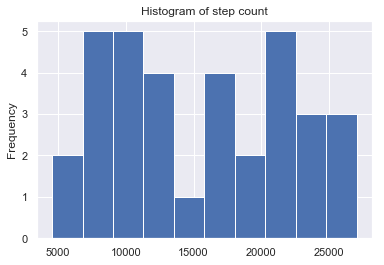

In [56]:
#As there are multiple rows of data for the same dates, it will be best to groupby date before plotting
stepcount_bydate = stepcount_df.groupby(stepcount_df.adj_create_time.dt.date)

#Histogram of daily step count
stepcount_bydate['count'].sum().plot(kind='hist', title='Histogram of step count')

The average step count is between 7500 and 12500, the maximum steps walked is in range 25000 to 27500.

Text(0,0.5,'Step count')

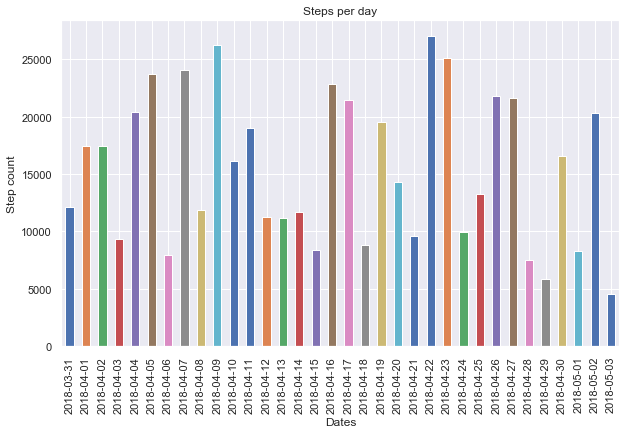

In [65]:
#Steps taken per day
plt.figure(figsize=(10,6))
ax=stepcount_bydate['count'].sum().plot(kind='bar', title="Steps per day")
ax.set_xlabel("Dates")
ax.set_ylabel("Step count")

Text(0,0.5,'Calories burned')

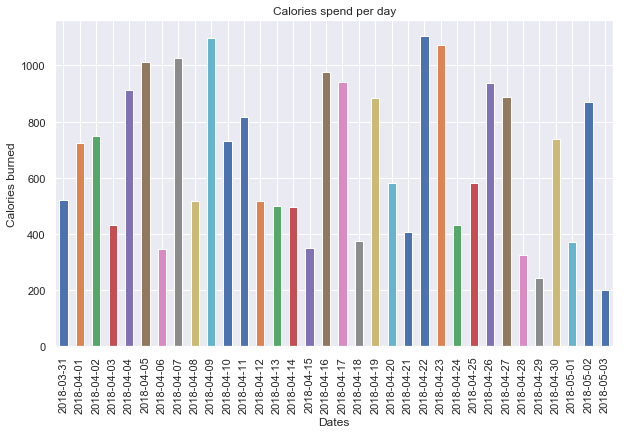

In [66]:
#Calories burned by day
plt.figure(figsize=(10,6))
ax=stepcount_bydate['calorie'].sum().plot(kind='bar', title="Calories spend per day")
ax.set_xlabel("Dates")
ax.set_ylabel("Calories burned")

Text(0,0.5,'Distance walked')

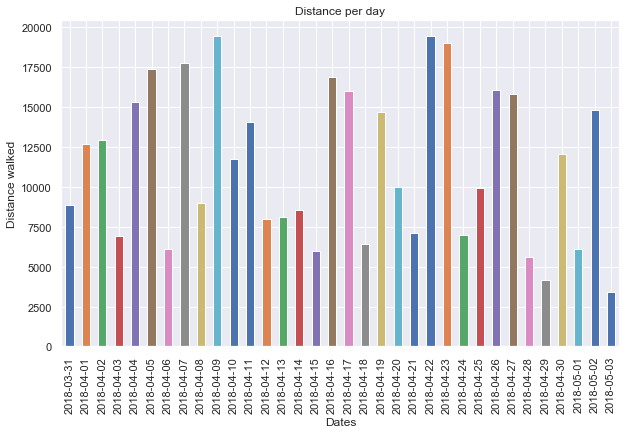

In [67]:
#Distance covered per day
plt.figure(figsize=(10,6))
ax=stepcount_bydate['distance'].sum().plot(kind='bar', title="Distance per day")
ax.set_xlabel("Dates")
ax.set_ylabel("Distance walked")

It is difficult to interpret the patterns when the plotting is based on dates. So lets seperate it based on hours and days in a week

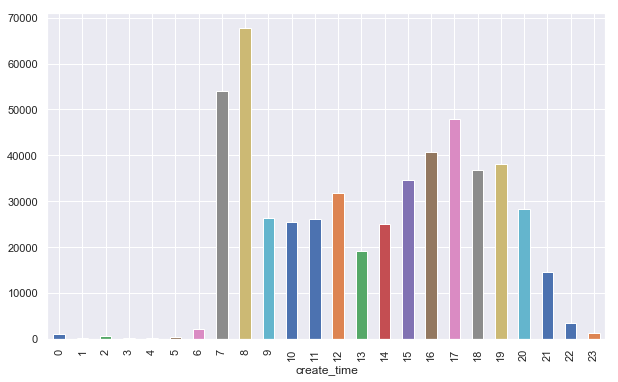

In [95]:
#Step count at different hours of the day
plt.figure(figsize=(10,6))
ax=stepcount_df.groupby(stepcount_df.create_time.dt.hour)['count'].sum().plot(kind='bar')
ax.set_xlabel("Hours")
ax.set_ylabel("Step count")

The average step count is higher during the morning hours of 7am-8am(morning office hours). This is consistent with the information in exercise data.

In [73]:
#Based on days in a week
stepcount_byday = stepcount_df.groupby(stepcount_df.day_name)

Text(0.5,0,'Step count')

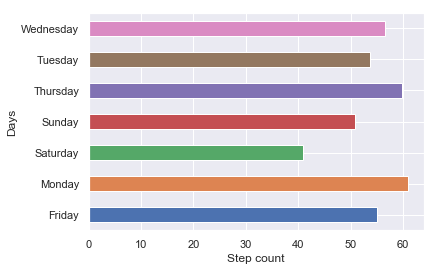

In [96]:
ax=stepcount_byday['count'].mean().plot(kind='barh')
ax.set_ylabel("Days")
ax.set_xlabel("Step count")

Monday and Thursday are more common walking days 

Text(0.5,0,'Days')

<Figure size 1152x432 with 0 Axes>

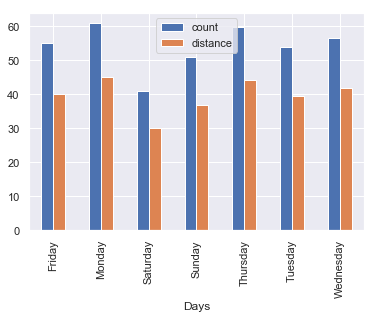

In [79]:
# Steps taken and distance covered over various days in the week
plt.figure(figsize=(16,6))
ax=stepcount_byday['count','distance'].mean().plot(kind='bar')
ax.set_xlabel("Days")

Text(0.5,0,'Days')

<Figure size 1152x576 with 0 Axes>

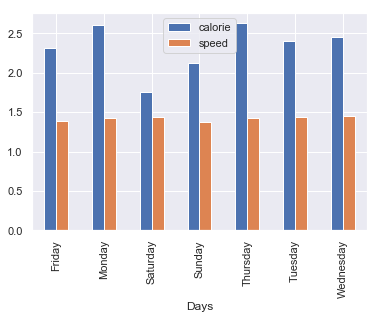

In [80]:
# Steps taken and distance covered over various days in the week
plt.figure(figsize=(16,8))
ax=stepcount_byday['calorie','speed'].mean().plot(kind='bar')
ax.set_xlabel("Days")

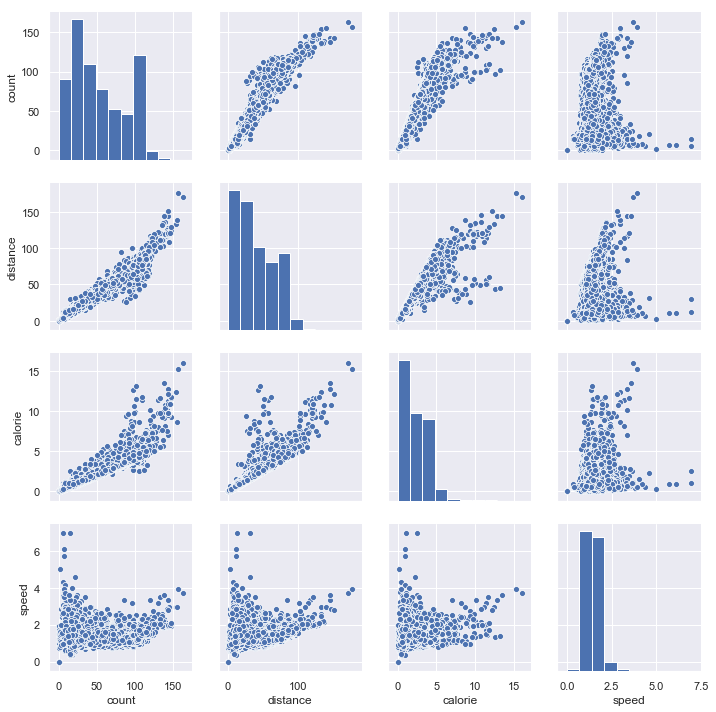

In [83]:
#Pairplot to find the correlation
sns.pairplot(data = stepcount_df[['count', 'distance', 'calorie', 'speed', 'day_name']])

The parameters are ositively correlated, and there are sme outliers.

C:\Users\Sija\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


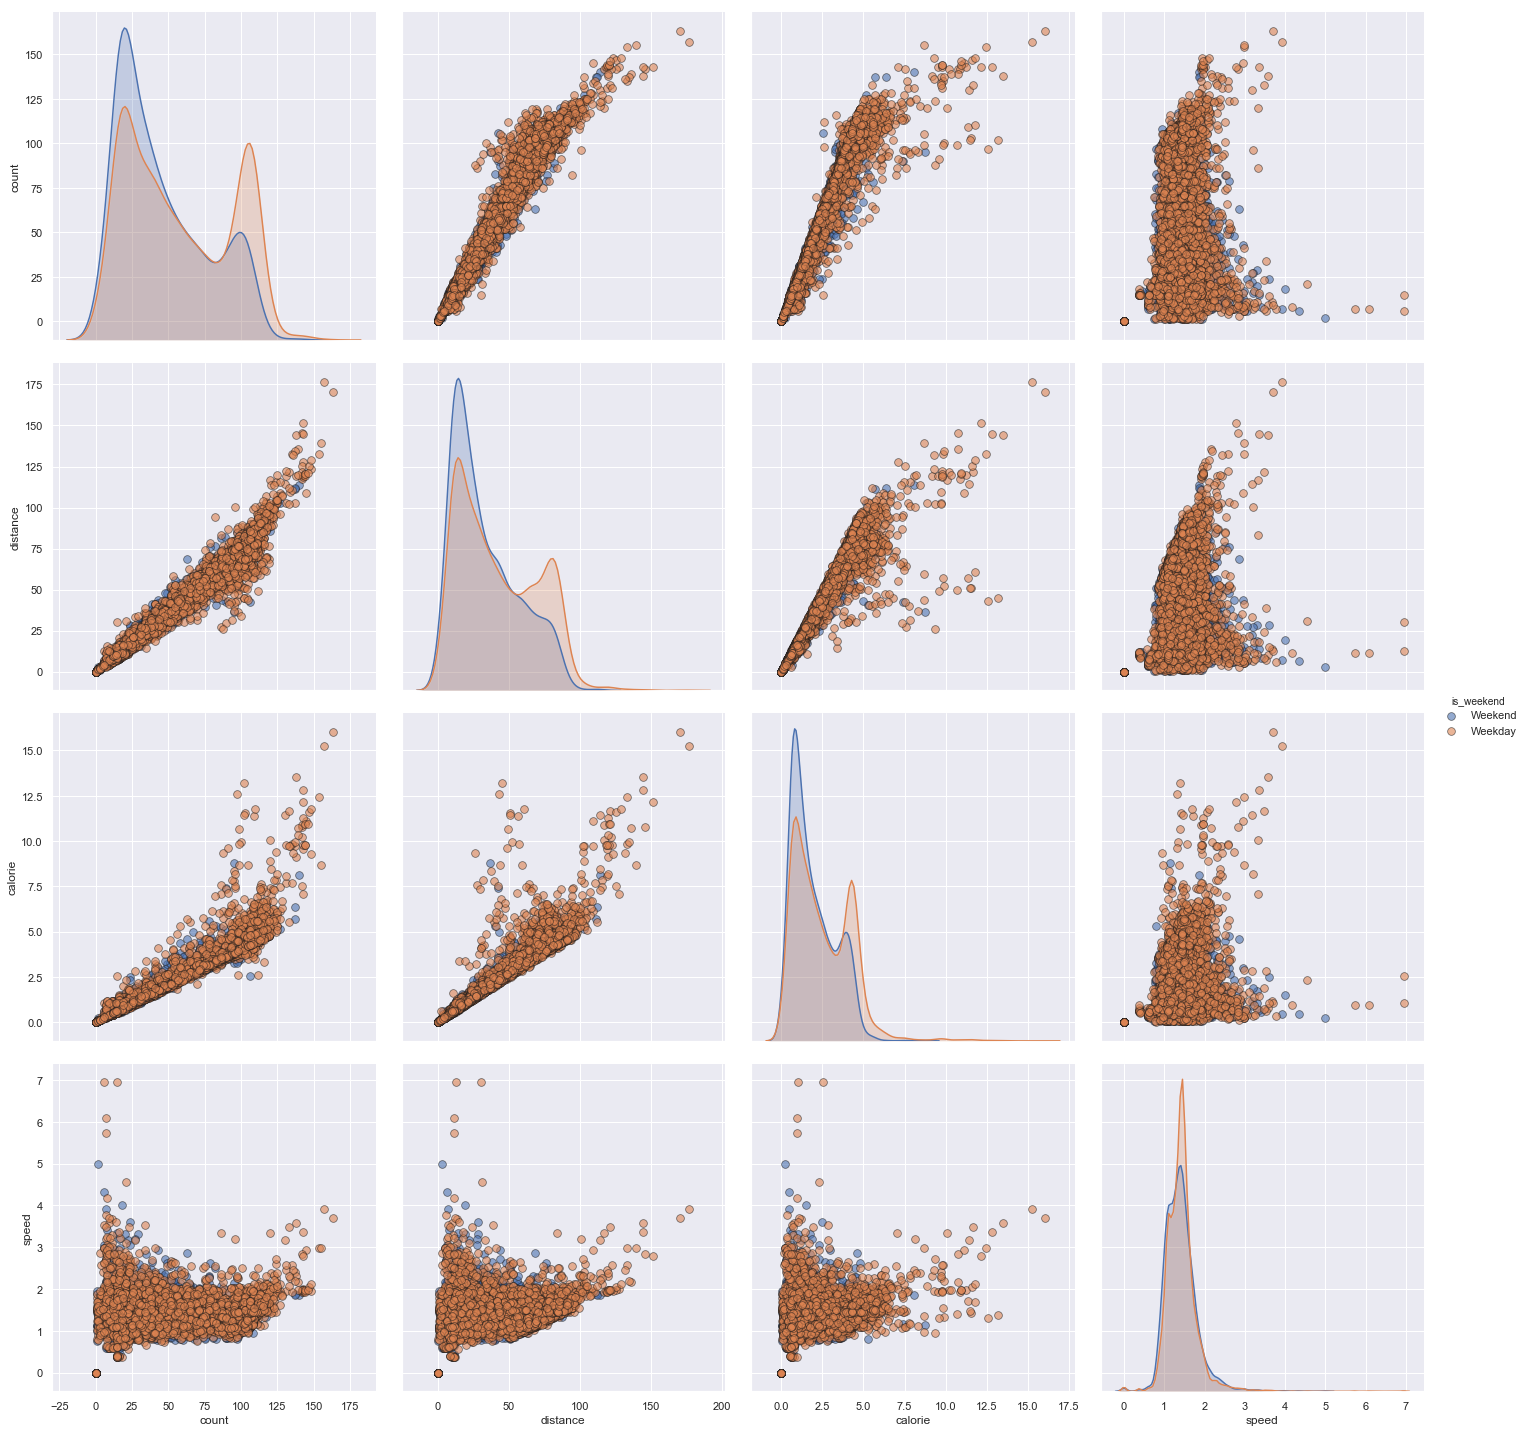

In [91]:
#Seperate weekdays from weekends as the statistics were lower on weekends 
sns.pairplot(hue = 'is_weekend', data = stepcount_df[['count', 'distance', 'calorie', 'speed', 'day_name', 'is_weekend']],\
             plot_kws = {'alpha': 0.6, 's': 60, 'edgecolor': 'k'}, size = 5)

### Joning dataframes based on create date

In [181]:
joined_df = pd.merge(sleep_df_2018, exercise_df_2018, on='create_date')
joined_df.drop(['sleep_time_offset','create_time_x','adj_start_time','adj_end_time','startdate_ordinal','end_time','start_time',\
                'create_time_y'],axis=1,inplace=True)

joined_df = pd.merge(joined_df, heartrate_df_2018, on='create_date')
joined_df.drop(['time_offset','deviceuuid','create_time'],axis=1,inplace=True)

joined_df = pd.merge(joined_df, floors_climbed_df_rel_2018, on='create_date')
joined_df.drop(['time_offset','create_time','adj_create_time_x','adj_create_time_y','adj_create_time'],axis=1,inplace=True)
joined_df.head()

,efficiency,create_date,minutes_slept,exercise_type,calorie,duration_mins,heart_rate,floor
0,92.21453,2018-01-06,578,1001,124.04,25,64.0,9.0
1,92.21453,2018-01-06,578,1001,124.04,25,64.0,7.0
2,92.21453,2018-01-06,578,1001,124.04,25,64.0,12.0
3,92.21453,2018-01-06,578,1001,124.04,25,62.0,9.0
4,92.21453,2018-01-06,578,1001,124.04,25,62.0,7.0


In [182]:
joined_df.tail()

,efficiency,create_date,minutes_slept,exercise_type,calorie,duration_mins,heart_rate,floor
190,93.99142,2018-02-18,465,1001,96.220,26,71.0,9.0
191,93.99142,2018-02-18,465,1001,116.190,30,68.0,9.0
192,93.99142,2018-02-18,465,1001,116.190,30,71.0,9.0
193,93.99142,2018-02-18,465,0,426.677,80,68.0,9.0
194,93.99142,2018-02-18,465,0,426.677,80,71.0,9.0


We have 194 rows of data when we combine the dataframes in to one based on the create date.
As there are no common dates between this joined dataframe and steps_count dataframe, it is not possible to merge these.

In [162]:
#Different approach would be to merge dataframes with common dates

In [214]:
#Dropping columns not needed
sleep_df1 = sleep_df_2018.drop(['sleep_time_offset','create_time','adj_start_time','adj_create_time','adj_end_time',\
                         'startdate_ordinal'],axis=1)
sleep_df1.reset_index(drop=True, inplace=True)

exercise_df1 = exercise_df_2018.drop(['end_time','start_time','deviceuuid','create_time'],axis=1)
exercise_df1.reset_index(drop=True, inplace=True)

#Merging Sleep and Exercise data
master_one_df = pd.merge(sleep_df1, exercise_df1, on='create_date', how='inner')

stepcount_df1 = stepcount_df.groupby(stepcount_df.create_date).sum().reset_index()

#Merging Stepcount data
master_one_df = pd.merge(master_one_df, stepcount_df1, on='create_date', how='inner')

#Moving create date to the first column
col='create_date'
master_one_df = pd.concat([master_one_df[col],master_one_df.drop(col,axis=1)], axis=1)
master_one_df = master_one_df.sort_values('create_date', ascending = True)

master_one_df.tail()

,create_date,efficiency,minutes_slept,exercise_type,calorie_x,duration_mins,count,calorie_y,speed,distance
70,2018-05-02,91.62304,381,1001,55.050000,13,20291,869.630990,473.810807,14826.117053
67,2018-05-02,91.62304,381,1001,50.079998,11,20291,869.630990,473.810807,14826.117053
68,2018-05-02,91.62304,381,1001,54.340000,13,20291,869.630990,473.810807,14826.117053
69,2018-05-02,91.62304,381,1001,45.900000,11,20291,869.630990,473.810807,14826.117053
71,2018-05-03,90.75000,400,1001,50.760002,10,4574,202.308997,111.615596,3425.300005


In [186]:
#Dropping columns not needed
floors_climbed_df1 = floors_climbed_df_rel_2018.drop(['time_offset','create_time','adj_create_time'],axis=1)
floors_climbed_df1.reset_index(drop=True, inplace=True)

heartrate_df1 = heartrate_df_2018.drop(['time_offset','adj_create_time','create_time'],axis=1)
heartrate_df1.reset_index(drop=True, inplace=True)

#Merging Heartrate and Floors climbed data
master_two_df = pd.merge(heartrate_df1, floors_climbed_df1, on='create_date', how='inner')

#Moving create date to the first column
col='create_date'
master_two_df = pd.concat([master_two_df[col],master_two_df.drop(col,axis=1)], axis=1)
master_two_df = master_two_df.sort_values('create_date', ascending = True)
master_two_df.tail()

,create_date,heart_rate,floor
141,2018-02-18,68.0,9.0
142,2018-02-18,71.0,9.0
144,2018-03-15,64.0,8.0
143,2018-03-15,58.0,8.0
145,2018-03-15,65.0,8.0


## Analysing summary dataset

In [260]:
summary_df = pd.read_csv("C:/Users/Sija/Downloads/summary.csv")
summary_df.head(2)

,create_time,longest_idle_time,score,extra_data,goal,calorie,run_time,deviceuuid,update_time,longest_active_time,day_time,walk_time,pkg_name,active_time,distance,others_time,step_count,datauuid
0,2018-01-14 05:00:56.527,15780000,0,00179515-d385-4f61-81a7-2ddd68ac80b2.extra_dat...,-1,927.1578,76845,jQfnryI8/B,2018-01-15 12:48:58.842,2400000,1515888000000,8814507,com.sec.android.app.shealth,11291352,9196.5030,2400000,12889,00179515-d385-4f61-81a7-2ddd68ac80b2
1,2018-01-03 05:03:32.135,22140000,0,003f0597-41ad-4f7f-bd02-6683076a1535.extra_dat...,-1,971.6040,43840,jQfnryI8/B,2018-01-04 11:41:12.193,5363575,1514937600000,5720581,com.sec.android.app.shealth,11982148,6962.8965,6217727,13135,003f0597-41ad-4f7f-bd02-6683076a1535


In [261]:
summary_df.drop(['extra_data','pkg_name','datauuid','others_time','update_time'], axis=1, inplace=True)
summary_df['create_time'] = pd.to_datetime(summary_df['create_time'])
summary_df['longest_idle_time'] = summary_df['longest_idle_time']//60000
summary_df['run_time'] = summary_df['longest_idle_time']//60000
summary_df['longest_active_time'] = summary_df['longest_active_time']//60000
summary_df['day_time'] = pd.to_datetime(summary_df['day_time'], unit='ms')
summary_df['walk_time'] = summary_df['walk_time']//60000
summary_df['active_time'] = summary_df['active_time']//60000
summary_df = summary_df.sort_values('create_time', ascending = True)
summary_df = summary_df.reset_index(drop=True)
summary_df.head(10)

,create_time,longest_idle_time,score,goal,calorie,run_time,deviceuuid,longest_active_time,day_time,walk_time,active_time,distance,step_count
0,2016-06-25 14:40:08.440,447,0,-1,329.498600,0,jQfnryI8/B,7,2016-06-25,48,60,5167.23830,6030
1,2016-06-25 14:40:08.675,495,0,-1,239.369980,0,jQfnryI8/B,7,2016-05-29,67,68,5300.38100,6876
2,2016-06-25 14:40:08.800,466,0,-1,124.390010,0,jQfnryI8/B,4,2016-05-30,37,38,2730.51050,3633
3,2016-06-25 14:40:08.941,389,0,-1,65.420006,0,jQfnryI8/B,1,2016-05-31,19,19,1373.68020,1789
4,2016-06-25 14:40:09.046,417,0,-1,369.350040,0,jQfnryI8/B,15,2016-06-01,82,89,7621.26860,9314
5,2016-06-25 14:40:09.155,427,0,-1,117.259995,0,jQfnryI8/B,1,2016-06-02,35,36,2538.44020,3322
6,2016-06-25 14:40:09.250,607,0,-1,130.900010,0,jQfnryI8/B,3,2016-06-03,37,39,2791.13000,3617
7,2016-06-25 14:40:09.380,351,0,-1,477.549900,0,jQfnryI8/B,8,2016-06-04,149,151,10545.62100,14009
8,2016-06-25 14:40:09.488,446,0,-1,686.399800,0,jQfnryI8/B,30,2016-06-05,218,219,16104.63000,22022
9,2016-06-25 14:40:09.727,541,0,-1,364.069950,0,jQfnryI8/B,20,2016-06-06,115,116,8402.11800,11468


Text(0.5,0,'Steps')

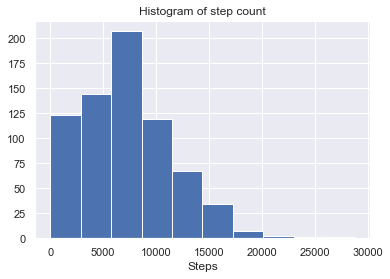

In [263]:
#Histogram
plt.hist(summary_df.step_count)
plt.title('Histogram of step count')
plt.xlabel('Steps')

Average steps taken 5000-7500.

Text(0.5,0,'Calories')

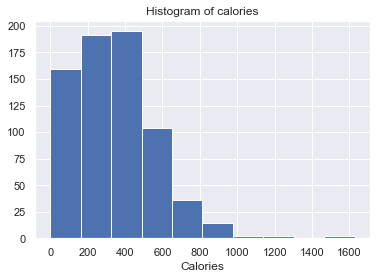

In [264]:
plt.hist(summary_df.calorie)
plt.title('Histogram of calories')
plt.xlabel('Calories')

Avergae calorie burnt 300-400 with few outliers of a maximum of 1600. We will try to figure out when the calories were used the most.

Text(0.5,0,'Distance')

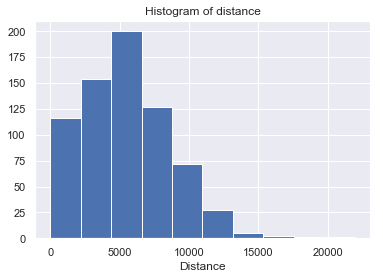

In [265]:
plt.hist(summary_df.distance)
plt.title('Histogram of distance')
plt.xlabel('Distance')

Assuming the distance specified is in meters, so the person walks areound 5-7kms on an average 

Text(0.5,1,'Steps pattern over time')

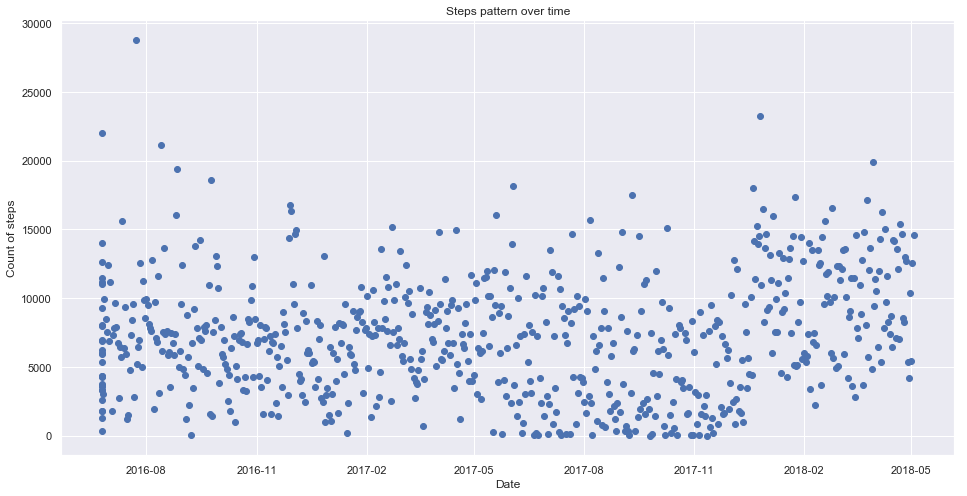

In [287]:
#Steps count over time
plt.figure(figsize=(16,8))
plt.plot_date(summary_df.create_time.dt.date, summary_df.step_count)
plt.xlabel('Date')
plt.ylabel('Count of steps')
plt.title('Steps pattern over time')

The person seems to have been more active in year 2018 as the average step count has increased drastically as compared to previous years. The trend shows a decline in mobiliy towards the second half of 2017.

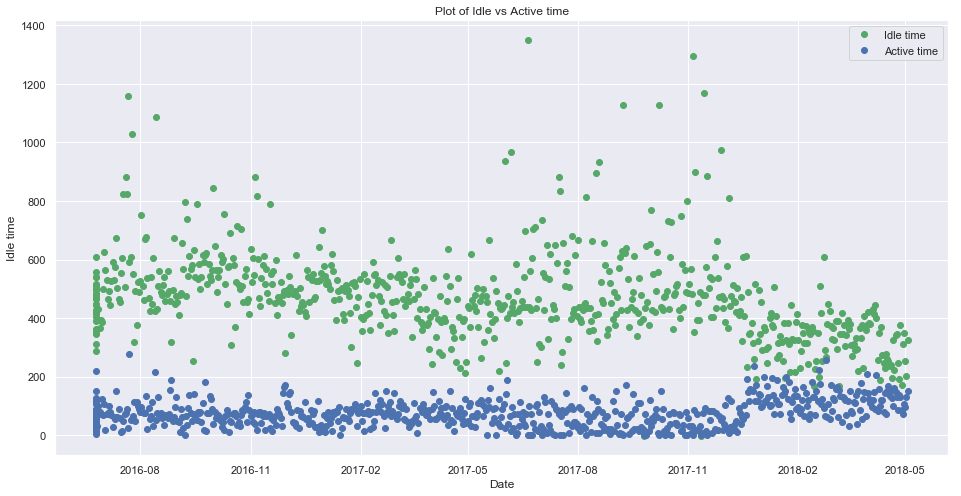

In [292]:
#Plot of idle time
plt.figure(figsize=(16,8))
plt.plot_date(summary_df.create_time.dt.date, summary_df.longest_idle_time, color='g', label = 'Idle time')
plt.plot_date(summary_df.create_time.dt.date, summary_df.active_time, color='b', label = 'Active time')
plt.xlabel('Date')
plt.ylabel('Idle time')
plt.title('Plot of Idle vs Active time')
plt.legend()

This graph gives a trend in Idle and active time. The longest idle time would most robably include the sleep time as well.
We can see that the trend is consistant with the previous plot, where idle time is less and active time is more in year 2018. The idle time is resonable on the higher side in 2017 with some values going up to 20 hours. A possible explanation is the fitness device was at a stationary place (may be being charged!) 

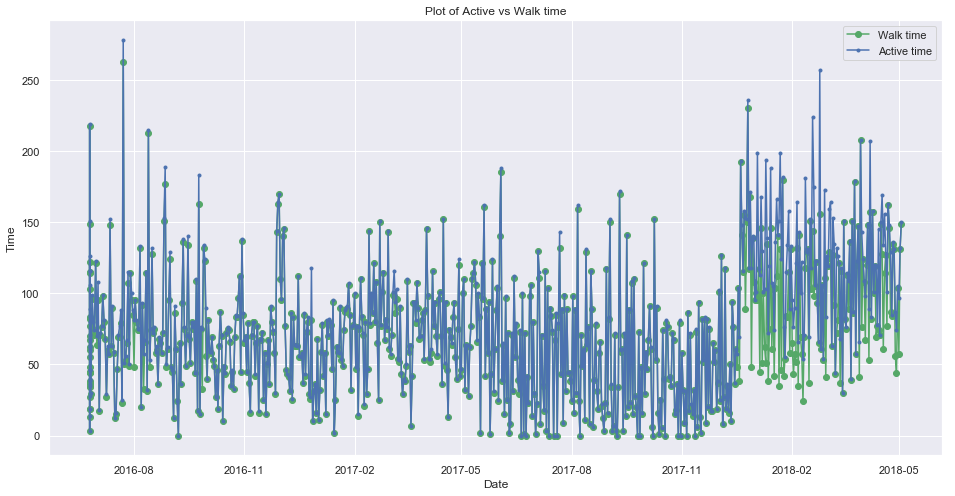

In [302]:
#Plot of idle time
plt.figure(figsize=(16,8))
plt.plot(summary_df.create_time.dt.date, summary_df.walk_time, 'o-',color='g', label = 'Walk time')
plt.plot(summary_df.create_time.dt.date, summary_df.active_time,'.-', color='b', label = 'Active time')
plt.xlabel('Date')
plt.ylabel('Time')
plt.title('Plot of Active vs Walk time')
plt.legend()

The walk time makes most of the contribution towards active time, however in 2018 the active time consist of other activities apart from walking. This could possibly be other exercise including running.

In [306]:
summary_byday = summary_df.groupby(summary_df.create_time.dt.day_name())
summary_byday.describe()

longest_idle_time                                                \
                        count        mean         std    min     25%    50%   
create_time                                                                   
Friday                   96.0  461.197917  158.658230  195.0  376.00  449.5   
Monday                   97.0  461.237113  136.991086   -1.0  397.00  439.0   
Saturday                124.0  473.822581  130.483095  171.0  396.75  475.0   
Sunday                   97.0  509.113402  187.699165   -1.0  390.00  507.0   
Thursday                 97.0  469.432990  132.879010  191.0  363.00  472.0   
Tuesday                  97.0  492.030928  186.222562  190.0  402.00  463.0   
Wednesday                97.0  434.113402  126.717359  168.0  371.00  421.0   

                             score              ...        distance  \
                75%     max  count       mean   ...             75%   
create_time                                     ...                   
Friday       530.00  1158.0   96.0  11.697917   ...     7443.366175   
Monday       526.00  1029.0   97.0  14.969072   ...     7533.864000   
Saturday     544.25   934.0  124.0  10.354839   ...     7932.943050   
Sunday       589.00  1296.0   97.0  14.762887   ...     6027.879400   
Thursday     536.00   938.0   97.0  19.556701   ...     7313.129000   
Tuesday      533.00  1349.0   97.0  17.731959   ...     6688.921000   
Wednesday    488.00   897.0   97.0  18.814433   ...     8559.059000   

                       step_count                                           \
                   max      count         mean          std   min      25%   
create_time                                                                  
Friday       14373.700       96.0  7195.500000  3874.595123  51.0  4508.25   
Monday       11903.984       97.0  7810.824742  3726.240082   0.0  6128.00   
Saturday     21945.938      124.0  7414.822581  5270.819080  54.0  3456.25   
Sunday       14095.673       97.0  6055.855670  4547.707279   0.0  2766.00   
Thursday     12226.832       97.0  6541.793814  4079.594600  63.0  3068.00   
Tuesday      18556.213       97.0  6586.701031  3973.751198  15.0  3928.00   
Wednesday    12771.422       97.0  8671.422680  3826.787515  31.0  6918.00   

                                        
                50%       75%      max  
create_time                             
Friday       7239.5   9440.75  19935.0  
Monday       7590.0   9932.00  15122.0  
Saturday     6142.0  10163.25  28763.0  
Sunday       4786.0   7893.00  17512.0  
Thursday     5995.0   9564.00  16454.0  
Tuesday      6709.0   8540.00  23270.0  
Wednesday    8979.0  11451.00  17979.0  

[7 rows x 80 columns]

Text(0.5,0,'Days')

<Figure size 720x432 with 0 Axes>

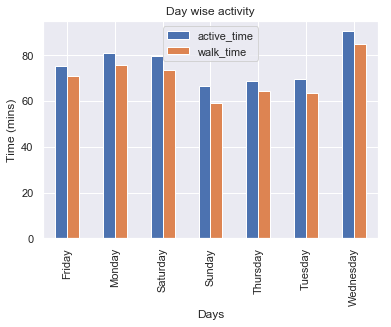

In [319]:
plt.figure(figsize=(10,6))
ax=summary_byday['active_time','walk_time'].mean().plot(kind='bar',title='Day wise activity')
ax.set_ylabel("Time (mins)")
ax.set_xlabel("Days")

Most active day is Wednesday. The difference between the active time and walk time can be assumed to be the time spend on other exercises.

Text(0.5,0,'Days')

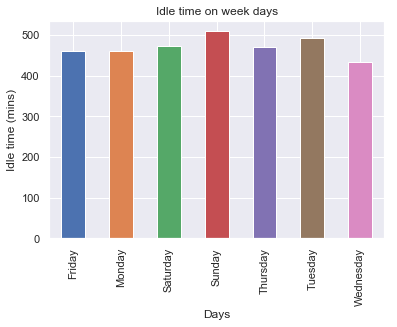

In [320]:
ax=summary_byday['longest_idle_time'].mean().plot(kind='bar',title='Idle time on week days')
ax.set_ylabel("Idle time (mins)")
ax.set_xlabel("Days")

Sunday seems to be the most idle day with average idle time of around 8.25hours. 

Text(0.5,0,'Days')

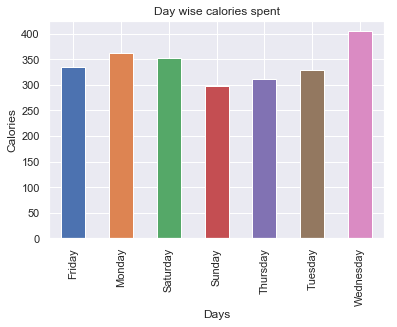

In [321]:
ax=summary_byday['calorie'].mean().plot(kind='bar',title='Day wise calories spent')
ax.set_ylabel("Calories")
ax.set_xlabel("Days")

In [318]:
summary_byhr = summary_df.groupby(summary_df.create_time.dt.hour)
summary_byhr.describe()

longest_idle_time                                               \
                        count        mean         std    min    25%    50%   
create_time                                                                  
4                       287.0  454.822300  168.966210   -1.0  364.5  432.0   
5                       110.0  416.400000  146.956288   -1.0  325.0  391.5   
6                        18.0  409.555556  208.719971  168.0  245.0  389.0   
7                       138.0  554.543478  140.919510  253.0  472.5  536.5   
8                       118.0  481.516949   89.314362  192.0  428.5  489.0   
9                         1.0  516.000000         NaN  516.0  516.0  516.0   
10                        1.0  414.000000         NaN  414.0  414.0  414.0   
12                        2.0  536.000000   74.953319  483.0  509.5  536.0   
14                       28.0  450.500000   75.345869  288.0  413.5  467.0   
16                        1.0  529.000000         NaN  529.0  529.0  529.0   
19                        1.0  323.000000         NaN  323.0  323.0  323.0   

                             score              ...         distance  \
                75%     max  count       mean   ...              75%   
create_time                                     ...                    
4            511.50  1349.0  287.0   0.000000   ...      7507.214850   
5            482.25  1168.0  110.0   0.000000   ...      8078.104975   
6            453.50   973.0   18.0   0.000000   ...      8177.470450   
7            604.00  1158.0  138.0  77.775362   ...      7182.247125   
8            530.75   789.0  118.0   0.000000   ...      6706.561125   
9            516.00   516.0    1.0   0.000000   ...      8042.771500   
10           414.00   414.0    1.0   0.000000   ...     11822.422000   
12           562.50   589.0    2.0   0.000000   ...      3405.577500   
14           496.50   607.0   28.0   0.000000   ...      6826.906400   
16           529.00   529.0    1.0   0.000000   ...      7500.687500   
19           323.00   323.0    1.0   0.000000   ...      3110.979200   

                        step_count                                      \
                    max      count          mean          std      min   
create_time                                                              
4            14441.1550      287.0   6713.059233  4434.158824      0.0   
5            12960.9470      110.0   8271.881818  4438.541402      0.0   
6            10216.1790       18.0   7705.722222  4620.180921    848.0   
7            21945.9380      138.0   7368.405797  4129.466026     31.0   
8            18556.2130      118.0   7137.228814  3874.760917    208.0   
9             8042.7715        1.0  10986.000000          NaN  10986.0   
10           11822.4220        1.0  14786.000000          NaN  14786.0   
12            3435.5600        2.0   4215.500000    20.506097   4201.0   
14           16104.6300       28.0   6547.535714  4712.034392    328.0   
16            7500.6875        1.0   9777.000000          NaN   9777.0   
19            3110.9792        1.0   8264.000000          NaN   8264.0   

                                                   
                  25%      50%       75%      max  
create_time                                        
4             3003.00   6710.0   9567.50  19935.0  
5             5077.75   8336.5  11689.00  17979.0  
6             5098.00   7462.5  11837.75  14443.0  
7             4845.75   6959.5   8614.50  28763.0  
8             4469.50   7026.0   8578.00  23270.0  
9            10986.00  10986.0  10986.00  10986.0  
10           14786.00  14786.0  14786.00  14786.0  
12            4208.25   4215.5   4222.75   4230.0  
14            3543.25   5639.0   8363.00  22022.0  
16            9777.00   9777.0   9777.00   9777.0  
19            8264.00   8264.0   8264.00   8264.0  

[11 rows x 80 columns]

Text(0.5,0,'Days')

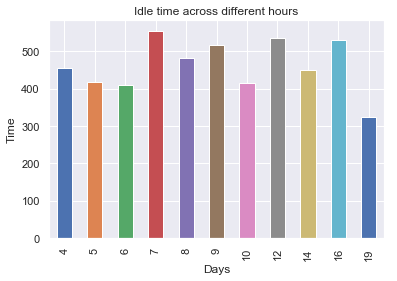

In [322]:
ax=summary_byhr['longest_idle_time'].mean().plot(kind='bar',title='Idle time across different hours')
ax.set_ylabel("Time")
ax.set_xlabel("Days")

As the hours in create date does not include night hours, we can rule out the assumption that idle time includes sleep hours. Longest idle time is recorded around 7am in the morning.

Text(0.5,0,'Days')

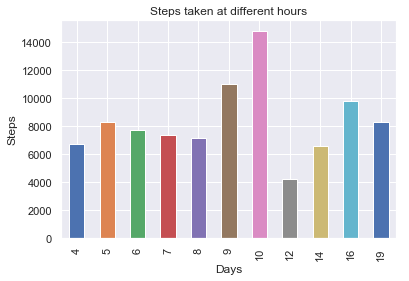

In [336]:
ax=summary_byhr['step_count'].mean().plot(kind='bar',title='Steps taken at different hours')
ax.set_ylabel("Steps")
ax.set_xlabel("Days")

Text(0.5,0,'Days')

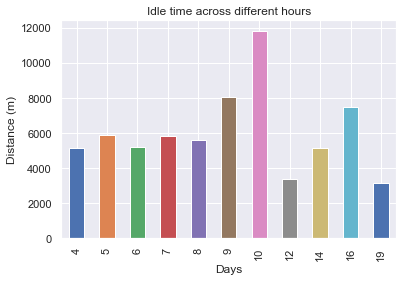

In [325]:
ax=summary_byhr['distance'].mean().plot(kind='bar',title='Distance walked at different hours')
ax.set_ylabel("Distance (m)")
ax.set_xlabel("Days")

The person must be walking to work

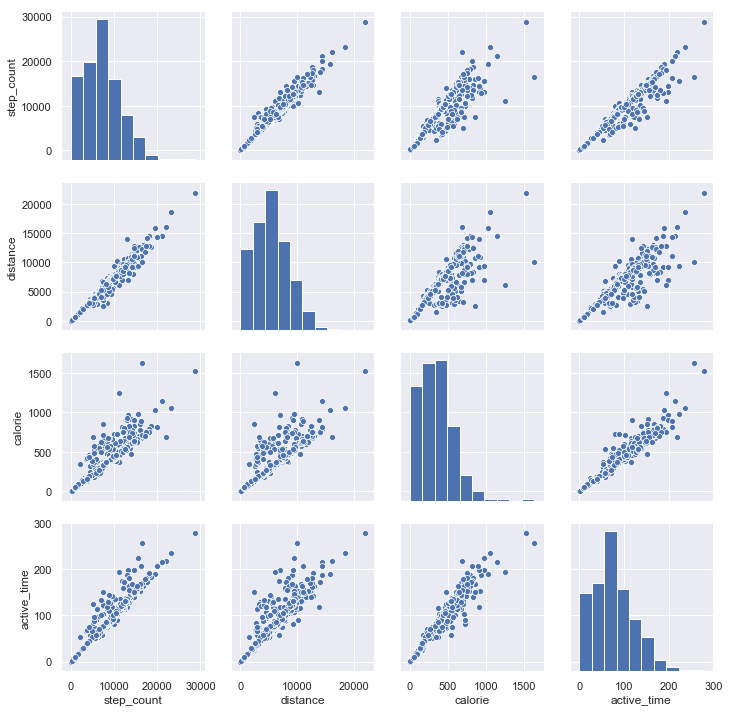

In [335]:
#Pairplot to find the correlation
sns.pairplot(data = summary_df[['step_count', 'distance', 'calorie', 'active_time']])

The parameters in summary dataset is all positively correlated. The person has increased his fitness levels lately, walks more around 10 am and is more active on Wednesdays.

In [ ]:
stepcount_df1 = stepcount_df.groupby(stepcount_df.create_date).sum().reset_index()
